In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("voice.csv")
data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["label"]=le.fit_transform(data["label"])


In [4]:
data.shape

(3168, 21)

In [5]:
data.size

66528

In [6]:
j=data.columns
k=1
for i in j:
    print(i,k)
    k+=1

meanfreq 1
sd 2
median 3
Q25 4
Q75 5
IQR 6
skew 7
kurt 8
sp.ent 9
sfm 10
mode 11
centroid 12
meanfun 13
minfun 14
maxfun 15
meandom 16
mindom 17
maxdom 18
dfrange 19
modindx 20
label 21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269BE9A4400>,
      dtype=object)

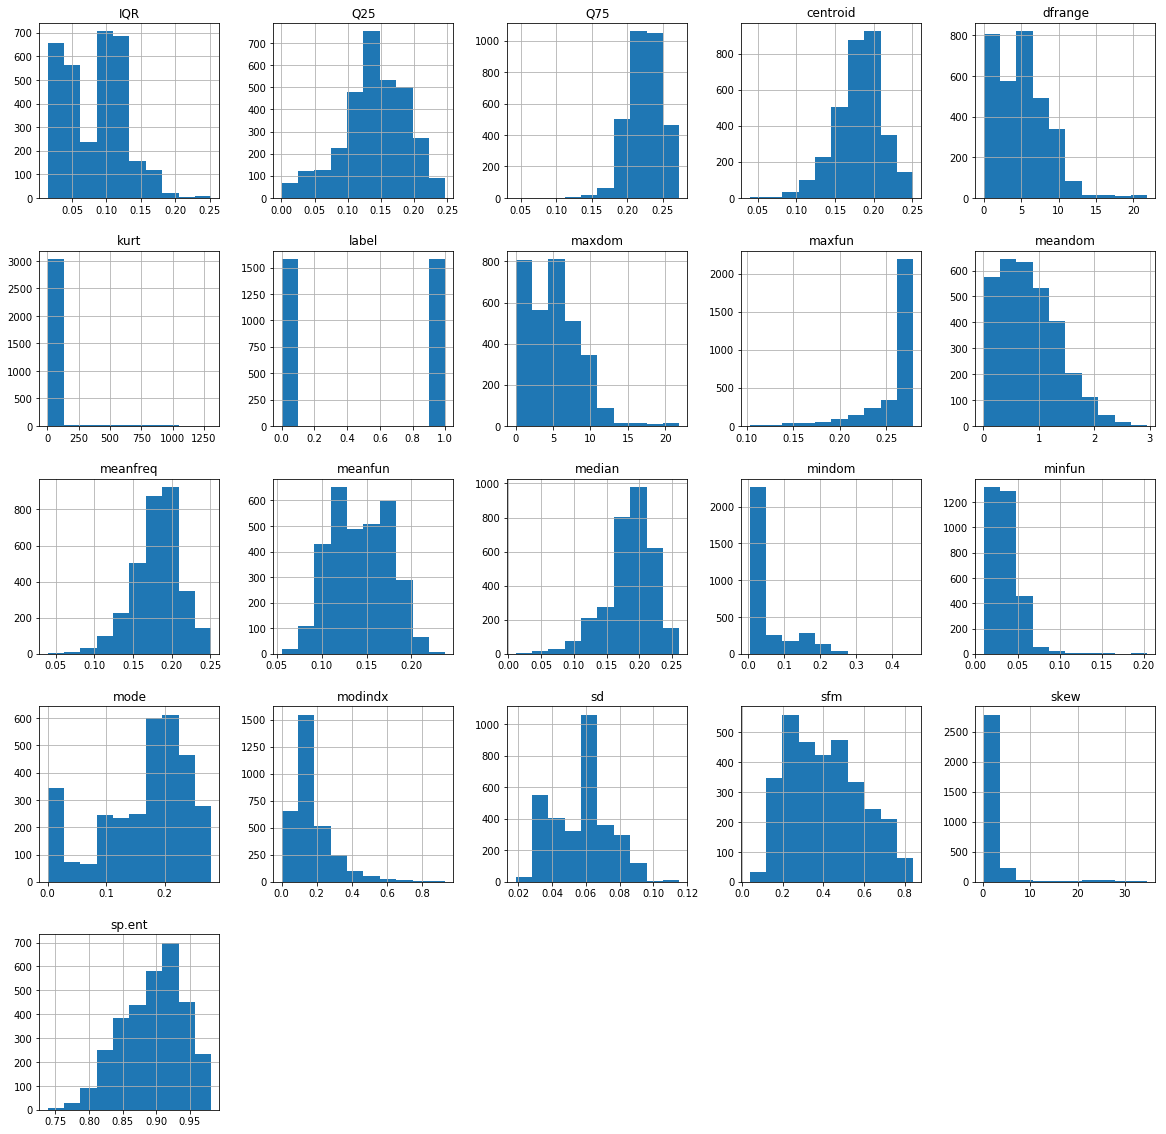

In [7]:
data.hist(figsize=(20,20))

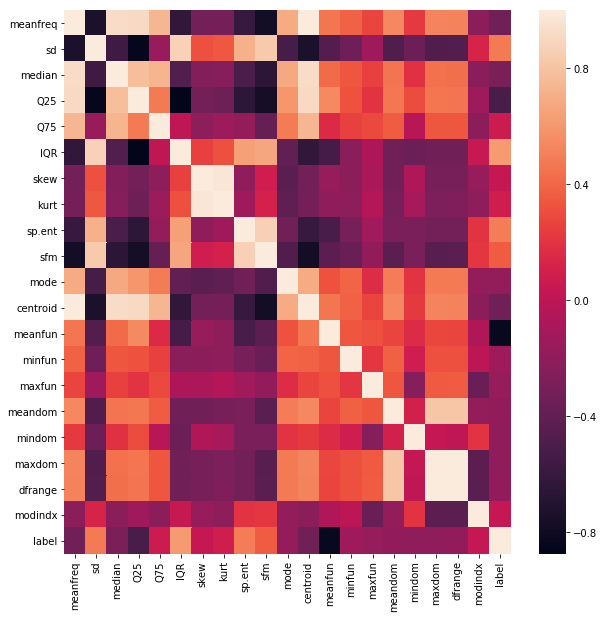

In [8]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr())

In [9]:
#sn.pairplot(data)

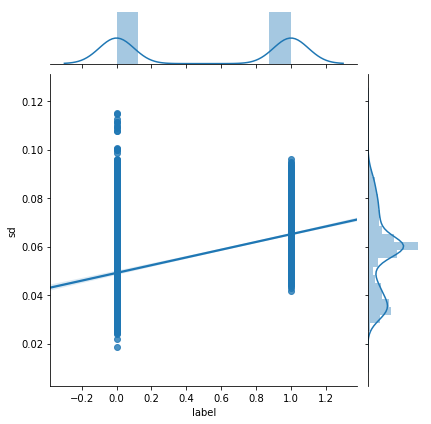

In [10]:
sn.jointplot(x="label",y="sd",data=data,kind="reg")

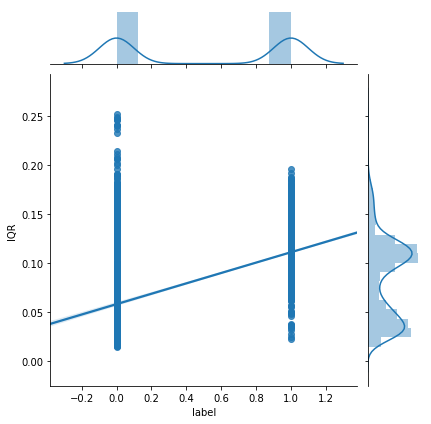

In [11]:
sn.jointplot(x="label",y="IQR",data=data,kind="reg")

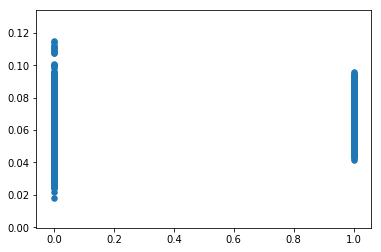

In [12]:
plt.scatter(data.label,data.sd,label="stars",s=30,marker="o")

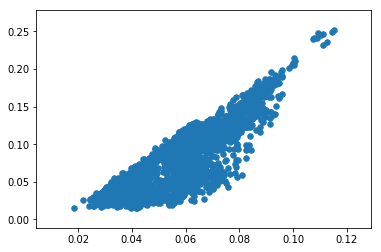

In [13]:
plt.scatter(data.sd,data.IQR,label="stars",s=30,marker="o")

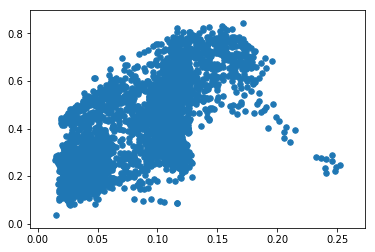

In [14]:
plt.scatter(data.IQR,data.sfm,label="stars",s=30,marker="o")

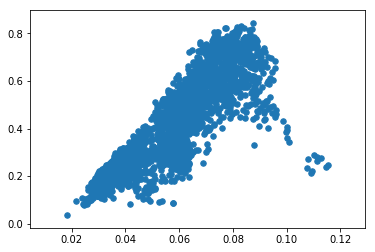

In [15]:
plt.scatter(data.sd,data.sfm,label="stars",s=30,marker="o")

In [16]:
real_x=data.iloc[:,:-1].values

In [17]:
real_y=data.iloc[:,-1].values

In [18]:
train_x,test_x,train_y,test_y=train_test_split(real_x,real_y,test_size=0.25,random_state=0)

In [19]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)

In [20]:
cls=SVC(kernel="rbf",random_state=0)
cls.fit(train_x,train_y)
pred_y=cls.predict(test_x)

In [21]:
test_y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [22]:
pred_y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [23]:
print(cls.score(train_x,train_y)*100)
print(cls.score(test_x,test_y)*100)

98.52693602693603
98.35858585858585


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm=confusion_matrix(test_y,pred_y)
cm

array([[368,   5],
       [  8, 411]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


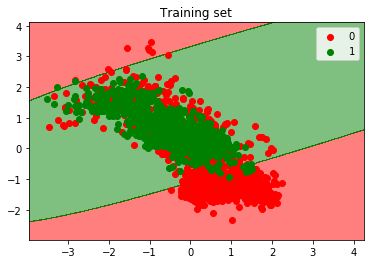

In [66]:
from matplotlib.colors import ListedColormap
x_set,y_set=train_x,train_y
x1, x2 = np.meshgrid(np.arange(start = real_x[:, 0].min() - 4, stop = real_x[:, 0].max() + 4, step = 0.01),
                     np.arange(start = real_x[:, 1].min() - 3, stop = real_x[:, 1].max() + 4, step = 0.01))
Xpred = np.array([x1.ravel(), x2.ravel()] + [np.repeat(0, x1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = cls.predict(Xpred).reshape(x1.shape)   # is a matrix of 0's and 1's !
plt.contourf(x1,x2, pred,alpha = 0.50, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
            c=ListedColormap(('red','green'))(i),label=j)
plt.title('Training set')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


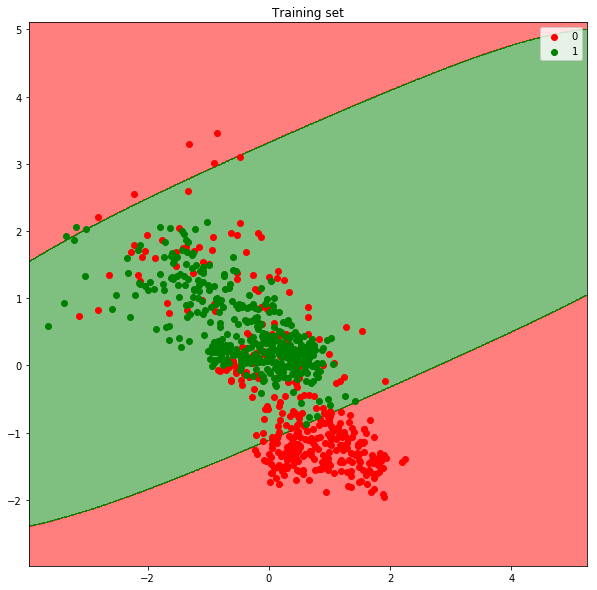

In [79]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,10))
x_set,y_set=test_x,test_y
x1, x2 = np.meshgrid(np.arange(start = real_x[:, 0].min() -4, stop = real_x[:, 0].max() + 5, step = 0.01),
                     np.arange(start = real_x[:, 1].min() -3, stop = real_x[:, 1].max() + 5, step = 0.01))
Xpred = np.array([x1.ravel(), x2.ravel()] + [np.repeat(0, x1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = cls.predict(Xpred).reshape(x1.shape)   # is a matrix of 0's and 1's !
plt.contourf(x1, x2, pred,alpha = 0.50, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
            c=ListedColormap(('red','green'))(i),label=j)

plt.title('Training set')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


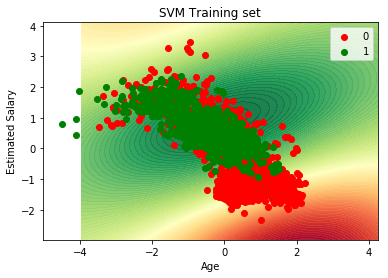

In [70]:
pred = cls.decision_function(Xpred).reshape(x1.shape)    
plt.contourf(x1, x2, pred,
             alpha=.90, cmap="RdYlGn", levels=np.linspace(pred.min(), pred.max(), 100))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
            c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Text(0.5, 0, 'Number of Neighbors')

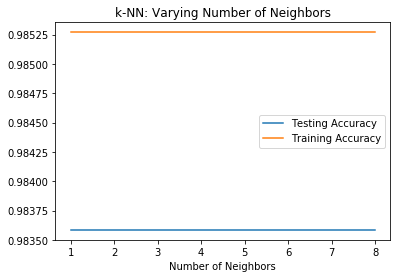

In [77]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    cls=SVC(kernel="rbf",random_state=0)
    cls.fit(train_x,train_y)
    # Fit the classifier to the training data
  
    
    # Compute accuracy on the training set
    train_accuracy[i] = cls.score(train_x, train_y)

    # Compute accuracy on the testing set
    test_accuracy[i] = cls.score(test_x, test_y)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
